In [ ]:
#The goal is to compare the performance of three(3) Recurrent Neural Networks (RNN) algorithm and combination of the three to predict the prices of cryptocurrencies, Bitcoin (BTC), Litecoin (LTC), and Ethereum (ETH).

## The goal is to compare the performance of three(3) Recurrent Neural Networks (RNN) algorithm in predicting the prices of cryptocurrencies, Bitcoin (BTC), Litecoin (LTC), and Ethereum (ETH).

In [1]:
"""
Author
Tokunbo Ojo    -  tooj21@student.bth.se
"""

'\nAuthor\nTokunbo Ojo    -  tooj21@student.bth.se\n'

# Author
Tokunbo Ojo - tooj21@student.bth.se

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [85]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta
#from binance.client import Client
import plotly.offline as pyo
import plotly.graph_objs as go
from sklearn.preprocessing import MinMaxScaler
import math # Mathematical functions
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error # Packages for measuring model performance / errors
from tensorflow.keras import Sequential # Deep learning library, used for neural networks
from tensorflow.keras.layers import LSTM, GRU, Bidirectional, Dense, Dropout # Deep learning classes for recurrent and regular densely-connected layers
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})

In [33]:
#Chart layout

layout = go.Layout(
    autosize=False,
    width=1100,
    height=500,

    xaxis= go.layout.XAxis(linecolor = 'black',
                          linewidth = 1,
                          mirror = True),

    yaxis= go.layout.YAxis(linecolor = 'black',
                          linewidth = 1,
                          mirror = True),

    margin=go.layout.Margin(
        l=20,
        r=20,
        b=50,
        t=50,
        pad = 4
    )
)

### This section collect historical data from binance and save it as csv.

In [34]:
#Get data from Binance Exchange
# Binance API Key
# api_key = ''
# api_secret = ''
# #Historical data interval -  Daily
# interval = '5m' # This can be adjusted to days, minutes, seconds or tick
# data_dir = "./dataset/"
# symbols = ['BTCUSDT', 'ETHUSDT', 'LTCUSDT']
#
# if len(api_secret) > 0 and len(api_key) > 0:
#     client = Client(api_key, api_secret)
#     for symbol in symbols:
#         #5 mins
#         klines = client.get_historical_klines(symbol, Client.KLINE_INTERVAL_5MINUTE, "1 Jan, 2023", "7 Jan, 2023")
#         data = pd.DataFrame(klines)
#         data.columns = ['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'qav', 'num_trades',
#                     'taker_base_vol', 'taker_quote_vol', 'ignore']
#         data.to_csv(data_dir + symbol + "_5MIN" + '.csv', index=None, header=True)
#         #15 mins
#         klines = client.get_historical_klines(symbol, Client.KLINE_INTERVAL_15MINUTE, "1 Jan, 2023", "14 Jan, 2023")
#         data = pd.DataFrame(klines)
#         data.columns = ['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'qav', 'num_trades',
#                     'taker_base_vol', 'taker_quote_vol', 'ignore']
#         data.to_csv(data_dir + symbol + "_15MIN" + '.csv', index=None, header=True)


# Explore the Data

In [35]:
#Load and clean data for all the pairs
df = {"btc_usdt_5min": None,
      "btc_usdt_15min": None,
      "eth_usdt_5min": None,
      "eth_usdt_15min": None,
      "ltc_usdt_5min": None,
      "ltc_usdt_15min": None}

df["btc_usdt_5min"] = pd.read_csv('./dataset/BTCUSDT_5MIN.csv')
df["btc_usdt_15min"] = pd.read_csv('./dataset/BTCUSDT_15MIN.csv')
df["eth_usdt_5min"] = pd.read_csv('./dataset/ETHUSDT_5MIN.csv')
df["eth_usdt_15min"] = pd.read_csv('./dataset/ETHUSDT_15MIN.csv')
df["ltc_usdt_5min"] = pd.read_csv('./dataset/LTCUSDT_5MIN.csv')
df["ltc_usdt_15min"] = pd.read_csv('./dataset/LTCUSDT_15MIN.csv')

# conver the timestamp to date
df["btc_usdt_5min"].index = [(dt.datetime.fromtimestamp(x / 1000.0)) for x in df["btc_usdt_5min"].close_time]
df["btc_usdt_15min"].index = [(dt.datetime.fromtimestamp(x / 1000.0)) for x in df["btc_usdt_15min"].close_time]
df["eth_usdt_5min"].index = [(dt.datetime.fromtimestamp(x / 1000.0)) for x in df["eth_usdt_5min"].close_time]
df["eth_usdt_15min"].index = [(dt.datetime.fromtimestamp(x / 1000.0)) for x in df["eth_usdt_15min"].close_time]
df["ltc_usdt_5min"].index = [(dt.datetime.fromtimestamp(x / 1000.0)) for x in df["ltc_usdt_5min"].close_time]
df["ltc_usdt_15min"].index = [(dt.datetime.fromtimestamp(x / 1000.0)) for x in df["ltc_usdt_15min"].close_time]
df["ltc_usdt_15min"] 

,open_time,open,high,low,close,volume,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,ignore
2023-01-01 00:14:59.999,1672531200000,70.14,70.24,69.81,69.81,5755.276,1672532099999,4.028489e+05,896,2098.525,1.468557e+05,0
2023-01-01 00:29:59.999,1672532100000,69.81,70.11,69.72,69.92,8617.562,1672532999999,6.028799e+05,966,5401.021,3.778499e+05,0
2023-01-01 00:44:59.999,1672533000000,69.92,69.92,69.14,69.22,22464.622,1672533899999,1.560526e+06,2219,3750.336,2.606852e+05,0
2023-01-01 00:59:59.999,1672533900000,69.22,69.47,69.20,69.31,5228.612,1672534799999,3.626032e+05,804,3450.055,2.392250e+05,0
2023-01-01 01:14:59.999,1672534800000,69.31,69.53,69.23,69.45,6215.989,1672535699999,4.311244e+05,739,3112.225,2.159058e+05,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-13 23:14:59.999,1673650800000,85.97,86.52,85.97,86.18,10066.293,1673651699999,8.686112e+05,1823,5394.573,4.653307e+05,0
2023-01-13 23:29:59.999,1673651700000,86.19,86.51,85.83,86.38,10703.395,1673652599999,9.220095e+05,1709,4198.814,3.617531e+05,0
2023-01-13 23:44:59.999,1673652600000,86.37,86.49,86.06,86.34,11331.076,1673653499999,9.775458e+05,1305,5658.766,4.879731e+05,0
2023-01-13 23:59:59.999,1673653500000,86.33,86.40,86.16,86.23,6370.774,1673654399999,5.496589e+05,1023,2685.583,2.317327e+05,0


In [36]:
trace_close_btc_usdt_5min = go.Scatter(x=df["btc_usdt_15min"].index, y=df["btc_usdt_5min"]['close'], mode='lines', name='BTC/USDT 5min close price')
layout1 = go.Layout( width=800, height=500,xaxis_title='BTC/USDT 5min close price')
fig = go.Figure(data=[trace_close_btc_usdt_5min], layout=layout1)
pyo.iplot(fig, filename = 'chart')

trace_close_btc_usdt_15min = go.Scatter(x=df["btc_usdt_15min"].index, y=df["btc_usdt_15min"]['close'], mode='lines', name='BTC/USDT 15min close price')
layout1 = go.Layout( width=800, height=500,xaxis_title='BTC/USDT 15min close price')
fig = go.Figure(data=[trace_close_btc_usdt_15min], layout=layout1)
pyo.iplot(fig, filename = 'chart')

trace_close_eth_usdt_5min = go.Scatter(x=df["eth_usdt_5min"].index, y=df["eth_usdt_5min"]['close'], mode='lines', name='ETH/USDT 5min close price')
layout1 = go.Layout( width=800, height=500,xaxis_title='ETH/USDT 5min close price')
fig = go.Figure(data=[trace_close_eth_usdt_5min], layout=layout1)
pyo.iplot(fig, filename = 'chart')

trace_close_eth_usdt_15min = go.Scatter(x=df["eth_usdt_15min"].index, y=df["eth_usdt_15min"]['close'], mode='lines', name='ETH/USDT 15min close price')
layout1 = go.Layout( width=800, height=500,xaxis_title='ETH/USDT 5min close price')
fig = go.Figure(data=[trace_close_eth_usdt_15min], layout=layout1)
pyo.iplot(fig, filename = 'chart')

trace_close_ltc_usdt_5min = go.Scatter(x=df["ltc_usdt_5min"].index, y=df["ltc_usdt_5min"]['close'], mode='lines', name='LTC/USDT 5min close price')
layout1 = go.Layout( width=800, height=500,xaxis_title='LTC/USDT 5min close price')
fig = go.Figure(data=[trace_close_ltc_usdt_5min], layout=layout1)
pyo.iplot(fig, filename = 'chart')

trace_close_ltc_usdt_15min = go.Scatter(x=df["ltc_usdt_15min"].index, y=df["ltc_usdt_15min"]['close'], mode='lines', name='LTC/USDT 15min close price')
layout1 = go.Layout( width=800, height=500,xaxis_title='LTC/USDT 15min close price')
fig = go.Figure(data=[trace_close_ltc_usdt_15min], layout=layout1)
pyo.iplot(fig, filename = 'chart')
#data = [trace_close_btc_usdt_5min, trace_close_btc_usdt_15min, trace_close_eth_usdt_5min, trace_close_eth_usdt_15min, trace_close_ltc_usdt_5min]
##fig = go.Figure(data=data, layout=layout)
# Plot it and save as basic-line.html
#pyo.iplot(fig, filename = 'chart')

# # Selecting Features

In [37]:
data_filtered_ext = {}
data_filtered = {}

for coin_pair in df:
  
  # Indexing Batches
  train_df = df[coin_pair].copy()

  # List of considered Features
  FEATURES = ['open', 'high', 'low', 'close', 'volume', 'num_trades']

  # Create the dataset with features and filter the data to the list of FEATURES
  data = pd.DataFrame(train_df)
  data_filtered[coin_pair] = data[FEATURES]

  # We add a prediction column and set dummy values to prepare the data for scaling
  data_filtered_ext[coin_pair] = data_filtered[coin_pair].copy()
  data_filtered_ext[coin_pair]['Prediction'] = data_filtered_ext[coin_pair]['close']

data_filtered_ext["eth_usdt_5min"]

,open,high,low,close,volume,num_trades,Prediction
2023-01-01 00:04:59.999,1196.13,1196.32,1195.65,1196.32,334.5592,1202,1196.32
2023-01-01 00:09:59.999,1196.31,1196.69,1194.90,1195.38,682.3876,1318,1195.38
2023-01-01 00:14:59.999,1195.38,1195.81,1194.55,1194.55,228.9387,1170,1194.55
2023-01-01 00:19:59.999,1194.55,1195.98,1194.31,1195.98,601.8903,1373,1195.98
2023-01-01 00:24:59.999,1195.98,1196.37,1195.97,1196.06,144.8048,1120,1196.06
...,...,...,...,...,...,...,...
2023-01-06 23:44:59.999,1268.63,1268.92,1268.23,1268.23,262.4641,765,1268.23
2023-01-06 23:49:59.999,1268.24,1270.97,1268.23,1270.34,645.9145,1221,1270.34
2023-01-06 23:54:59.999,1270.34,1270.88,1269.35,1269.35,367.8022,965,1269.35
2023-01-06 23:59:59.999,1269.36,1269.49,1269.13,1269.14,182.6618,580,1269.14


# Scaling the Data

In [38]:
np_data_unscaled = {}
np_Close_scaled = {}
np_data_scaled = {}

scaler = {"btc_usdt_5min": MinMaxScaler(),
      "btc_usdt_15min": MinMaxScaler(),
      "eth_usdt_5min": MinMaxScaler(),
      "eth_usdt_15min": MinMaxScaler(),
      "ltc_usdt_5min": MinMaxScaler(),
      "ltc_usdt_15min": MinMaxScaler()}

for coin_pair in df:
  # Get the number of rows in the data
  nrows = data_filtered[coin_pair].shape[0]

  # Convert the data to numpy values
  np_data_unscaled[coin_pair] = np.array(data_filtered[coin_pair])
  np_data = np.reshape(np_data_unscaled[coin_pair], (nrows, -1))
  print(np_data.shape)

  # Transform the data by scaling each feature to a range between 0 and 1
  np_data_scaled[coin_pair] = scaler[coin_pair].fit_transform(np_data_unscaled[coin_pair])

  # Creating a separate scaler that works on a single column for scaling predictions
  df_Close = pd.DataFrame(data_filtered_ext[coin_pair]['close'])
  np_Close_scaled[coin_pair] = scaler[coin_pair].fit_transform(df_Close)

np_data_unscaled["eth_usdt_5min"]  

(1729, 6)
(1249, 6)
(1729, 6)
(1249, 6)
(1729, 6)
(1249, 6)


array([[1196.13  , 1196.32  , 1195.65  , 1196.32  ,  334.5592, 1202.    ],
       [1196.31  , 1196.69  , 1194.9   , 1195.38  ,  682.3876, 1318.    ],
       [1195.38  , 1195.81  , 1194.55  , 1194.55  ,  228.9387, 1170.    ],
       ...,
       [1270.34  , 1270.88  , 1269.35  , 1269.35  ,  367.8022,  965.    ],
       [1269.36  , 1269.49  , 1269.13  , 1269.14  ,  182.6618,  580.    ],
       [1269.13  , 1269.14  , 1267.36  , 1267.48  ,  974.4259, 1515.    ]])

Transforming the  Data. We will apply the sliding window approach to our data

In [39]:
# The RNN needs data with the format of [samples, time steps, features]
# Here, we create N samples, sequence_length time steps per sample, and 6 features
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(data[i, index_Close]) #contains the prediction values for validation,  for single-step prediction

    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

In [40]:
# Set the sequence length - this is the timeframe used to make a single prediction
sequence_length = 50
x_train = {}
y_train = {}
x_test = {}
y_test = {}

for coin_pair in df:  
  # Prediction Index
  index_Close = data_filtered[coin_pair].columns.get_loc("close")

  # Split the training data into train and train data sets
  # As a first step, we get the number of rows to train the model on 80% of the data
  train_data_len = math.ceil(np_data_scaled[coin_pair].shape[0] * 0.8)

  # Create the training and test data
  train_data = np_data_scaled[coin_pair][0:train_data_len, :]
  test_data = np_data_scaled[coin_pair][train_data_len - sequence_length:, :]



  # Generate training data and test data
  x_train[coin_pair], y_train[coin_pair] = partition_dataset(sequence_length, train_data)
  x_test[coin_pair], y_test[coin_pair] = partition_dataset(sequence_length, test_data)

  # Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
  print(x_train[coin_pair].shape, y_train[coin_pair].shape)
  print(x_test[coin_pair].shape, y_test[coin_pair].shape)

  # Validate that the prediction value and the input match up
  # The last close price of the second input sample should equal the first prediction value
  print(x_train[coin_pair][1][sequence_length-1][index_Close])
  print(y_train[coin_pair][0])

(1334, 50, 6) (1334,)
(345, 50, 6) (345,)
0.034121532632262586
0.034121532632262586
(950, 50, 6) (950,)
(249, 50, 6) (249,)
0.012345217563100697
0.012345217563100697
(1334, 50, 6) (1334,)
(345, 50, 6) (345,)
0.008359583232373069
0.008359583232373069
(950, 50, 6) (950,)
(249, 50, 6) (249,)
0.018517829918565987
0.018517829918565987
(1334, 50, 6) (1334,)
(345, 50, 6) (345,)
0.029816513761468322
0.029816513761468322
(950, 50, 6) (950,)
(249, 50, 6) (249,)
0.046486486486486456
0.046486486486486456


# Train the LSTM Prediction Model

In [41]:
model = {"btc_usdt_5min": None,
      "btc_usdt_15min": None,
      "eth_usdt_5min": None,
      "eth_usdt_15min": None,
      "ltc_usdt_5min": None,
      "ltc_usdt_15min": None}

for coin_pair in df:  
  # Configure the neural network model
  model[coin_pair] = Sequential()

  # Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
  n_neurons = x_train[coin_pair].shape[1] * x_train[coin_pair].shape[2]
  print(n_neurons, x_train[coin_pair].shape[1], x_train[coin_pair].shape[2])
  model[coin_pair].add(LSTM(n_neurons, return_sequences=True, input_shape=(x_train[coin_pair].shape[1], x_train[coin_pair].shape[2])))
  model[coin_pair].add(LSTM(n_neurons, return_sequences=False))
  model[coin_pair].add(Dense(6))
  model[coin_pair].add(Dense(1))

  # Compile the model
  model[coin_pair].compile(optimizer='adam', loss='mse')


300 50 6
300 50 6
300 50 6
300 50 6
300 50 6
300 50 6


In [42]:
# Training the model
epochs = 50
batch_size = 16
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)

history = {"btc_usdt_5min": None,
      "btc_usdt_15min": None,
      "eth_usdt_5min": None,
      "eth_usdt_15min": None,
      "ltc_usdt_5min": None,
      "ltc_usdt_15min": None}

for coin_pair in df:  
  history[coin_pair] = model[coin_pair].fit(x_train[coin_pair], y_train[coin_pair],
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test[coin_pair], y_test[coin_pair])
                   )

Epoch 1/50
84/84 [==============================] - 6s 25ms/step - loss: 0.0064 - val_loss: 0.0014
Epoch 2/50
84/84 [==============================] - 1s 10ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 3/50
84/84 [==============================] - 1s 10ms/step - loss: 0.0010 - val_loss: 0.0041
Epoch 4/50
84/84 [==============================] - 1s 10ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 5/50
84/84 [==============================] - 1s 10ms/step - loss: 8.7446e-04 - val_loss: 0.0010
Epoch 6/50
84/84 [==============================] - 1s 10ms/step - loss: 9.6504e-04 - val_loss: 0.0011
Epoch 7/50
84/84 [==============================] - 1s 11ms/step - loss: 7.2039e-04 - val_loss: 8.0158e-04
Epoch 8/50
84/84 [==============================] - 1s 10ms/step - loss: 6.5752e-04 - val_loss: 0.0012
Epoch 9/50
84/84 [==============================] - 1s 11ms/step - loss: 6.1700e-04 - val_loss: 0.0013
Epoch 10/50
84/84 [==============================] - 1s 10ms/step - loss: 5.9340e-04 

# Plot training & validation loss values LSTM

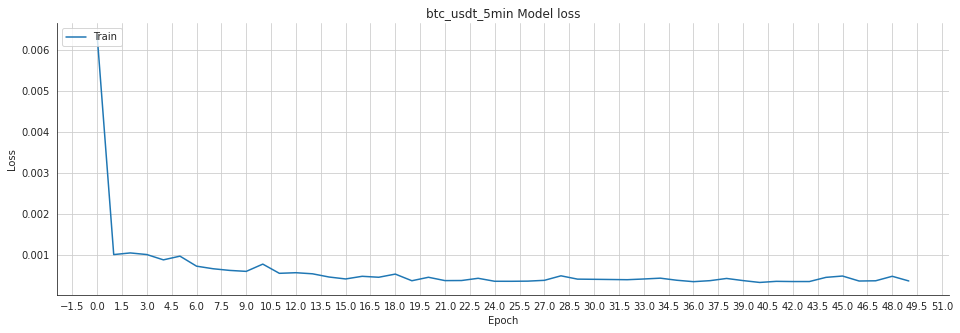

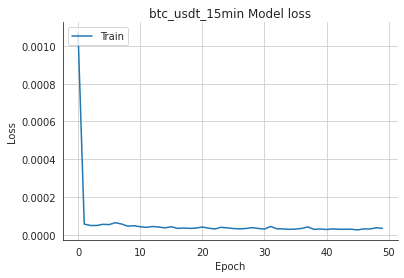

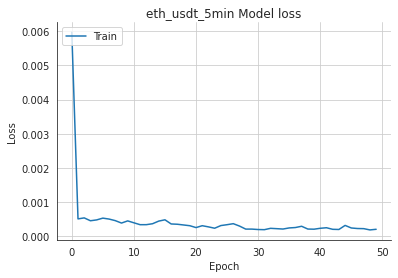

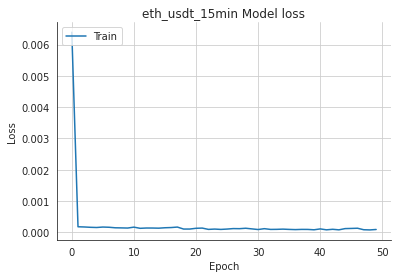

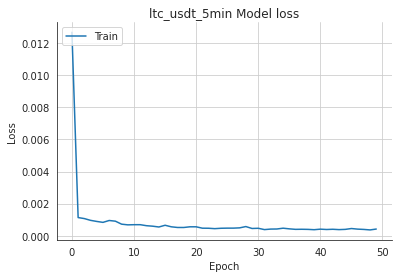

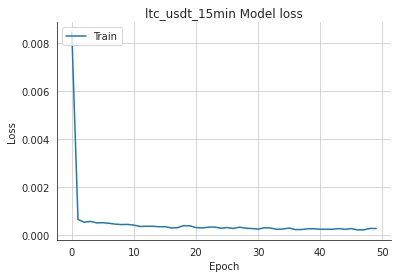

In [46]:
# Plot training & validation loss values
fig, ax = plt.subplots(figsize=(16, 5), sharex=True)
for coin_pair in df:  
  sns.lineplot(data=history[coin_pair].history["loss"])
  plt.title(coin_pair + " Model loss")
  plt.ylabel("Loss")
  plt.xlabel("Epoch")
  ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
  plt.legend(["Train", "Test"], loc="upper left")
  plt.grid()
  plt.show()

# Get the predicted values LSTM

In [47]:
result ={"LSTM": [], "GRU": [], "bi_LSTM": []}
y_pred_scaled = {}
y_pred = {}
y_test_unscaled = {}

for coin_pair in df: 
  # Get the predicted values
  y_pred_scaled[coin_pair] = model[coin_pair].predict(x_test[coin_pair])

  # Unscale the predicted values
  y_pred[coin_pair] = scaler[coin_pair].inverse_transform(y_pred_scaled[coin_pair])
  y_test_unscaled[coin_pair] = scaler[coin_pair].inverse_transform(y_test[coin_pair].reshape(-1, 1))

  print(coin_pair)
  # Mean Absolute Error (MAE)
  MAE = mean_absolute_error(y_test_unscaled[coin_pair], y_pred[coin_pair])
  print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')
  result["LSTM"].append(np.round(MAE, 2))

  # Mean Absolute Percentage Error (MAPE)
  MAPE = np.mean((np.abs(np.subtract(y_test_unscaled[coin_pair], y_pred[coin_pair])/ y_test_unscaled[coin_pair]))) * 100
  print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

  # Median Absolute Percentage Error (MDAPE)
  MDAPE = np.median((np.abs(np.subtract(y_test_unscaled[coin_pair], y_pred[coin_pair])/ y_test_unscaled[coin_pair])) ) * 100
  print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

result  

11/11 [==============================] - 0s 7ms/step
btc_usdt_5min
Median Absolute Error (MAE): 7.27
Mean Absolute Percentage Error (MAPE): 0.04 %
Median Absolute Percentage Error (MDAPE): 0.03 %
8/8 [==============================] - 0s 6ms/step
btc_usdt_15min
Median Absolute Error (MAE): 40.02
Mean Absolute Percentage Error (MAPE): 0.21 %
Median Absolute Percentage Error (MDAPE): 0.11 %
11/11 [==============================] - 0s 6ms/step
eth_usdt_5min
Median Absolute Error (MAE): 0.77
Mean Absolute Percentage Error (MAPE): 0.06 %
Median Absolute Percentage Error (MDAPE): 0.04 %
8/8 [==============================] - 0s 6ms/step
eth_usdt_15min
Median Absolute Error (MAE): 4.92
Mean Absolute Percentage Error (MAPE): 0.35 %
Median Absolute Percentage Error (MDAPE): 0.29 %
11/11 [==============================] - 0s 6ms/step
ltc_usdt_5min
Median Absolute Error (MAE): 0.17
Mean Absolute Percentage Error (MAPE): 0.23 %
Median Absolute Percentage Error (MDAPE): 0.22 %
8/8 [================

{'LSTM': [7.27, 40.02, 0.77, 4.92, 0.17, 0.3], 'GRU': [], 'bi_LSTM': []}

In [52]:
visualise_pred = {}
for coin_pair in df: 
  train_data_len = math.ceil(np_data_scaled[coin_pair].shape[0] * 0.8)
  visualise_pred[coin_pair] = data_filtered[coin_pair].iloc[train_data_len:, 3:4]
  visualise_pred[coin_pair]['prediction'] = y_pred[coin_pair]
  visualise_pred[coin_pair]['test'] = y_test_unscaled[coin_pair]
visualise_pred["btc_usdt_5min"]

,close,prediction,test
2023-01-05 19:24:59.999,16844.56,16846.210938,16844.56
2023-01-05 19:29:59.999,16834.72,16847.109375,16834.72
2023-01-05 19:34:59.999,16835.15,16837.144531,16835.15
2023-01-05 19:39:59.999,16849.38,16836.113281,16849.38
2023-01-05 19:44:59.999,16846.32,16851.283203,16846.32
...,...,...,...
2023-01-06 23:44:59.999,16943.20,16951.033203,16943.20
2023-01-06 23:49:59.999,16961.14,16942.697266,16961.14
2023-01-06 23:54:59.999,16952.01,16960.789062,16952.01
2023-01-06 23:59:59.999,16950.65,16947.861328,16950.65


Quick view of the actual price and predicted price

In [55]:

for coin_pair in df: 
  trace_test = go.Scatter(x=visualise_pred[coin_pair].index, y=visualise_pred[coin_pair]['test'], mode='lines', name='Test')
  trace_pred = go.Scatter(x=visualise_pred[coin_pair].index, y=visualise_pred[coin_pair]['prediction'], mode='lines', name='Prediction')
  data = [trace_test, trace_pred]
  layout2 = go.Layout( width=1000, height=700,xaxis_title=coin_pair)
  fig = go.Figure(data=data, layout=layout2)
  # Plot it and save as basic-line.html
  pyo.iplot(fig, filename = 'chart')

# Training GRU Prediction Model

In [56]:

for coin_pair in df:  
  # Configure the neural network model
  model[coin_pair] = Sequential()

  model[coin_pair].add(GRU(n_neurons, return_sequences=True, input_shape=(x_train[coin_pair].shape[1], x_train[coin_pair].shape[2])))
  model[coin_pair].add(GRU(n_neurons, return_sequences=False))
  model[coin_pair].add(Dense(6))
  model[coin_pair].add(Dense(1))

  # Compile the model
  model[coin_pair].compile(optimizer='adam', loss='mse')


In [57]:
# Training the model

for coin_pair in df:  
  history[coin_pair] = model[coin_pair].fit(x_train[coin_pair], y_train[coin_pair],
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test[coin_pair], y_test[coin_pair])
                   )

Epoch 1/50
84/84 [==============================] - 5s 19ms/step - loss: 0.0084 - val_loss: 8.0419e-04
Epoch 2/50
84/84 [==============================] - 1s 11ms/step - loss: 6.3594e-04 - val_loss: 6.6328e-04
Epoch 3/50
84/84 [==============================] - 1s 10ms/step - loss: 5.7298e-04 - val_loss: 6.4298e-04
Epoch 4/50
84/84 [==============================] - 1s 10ms/step - loss: 5.4234e-04 - val_loss: 5.5932e-04
Epoch 5/50
84/84 [==============================] - 1s 10ms/step - loss: 6.0667e-04 - val_loss: 9.4233e-04
Epoch 6/50
84/84 [==============================] - 1s 13ms/step - loss: 4.8820e-04 - val_loss: 7.4124e-04
Epoch 7/50
84/84 [==============================] - 1s 14ms/step - loss: 4.2867e-04 - val_loss: 5.2103e-04
Epoch 8/50
84/84 [==============================] - 1s 14ms/step - loss: 4.2640e-04 - val_loss: 5.1284e-04
Epoch 9/50
84/84 [==============================] - 1s 11ms/step - loss: 4.3002e-04 - val_loss: 6.8186e-04
Epoch 10/50
84/84 [======================

# Plot training & validation loss values for GRU

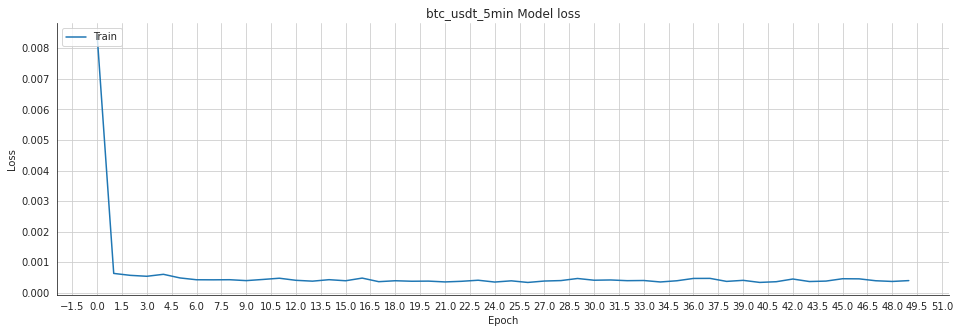

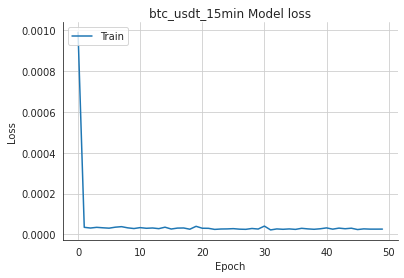

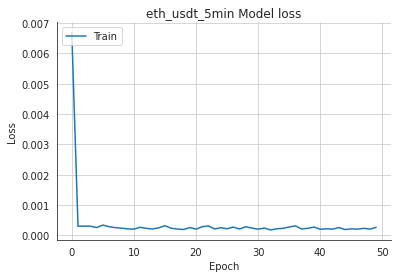

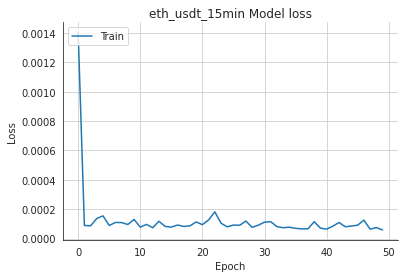

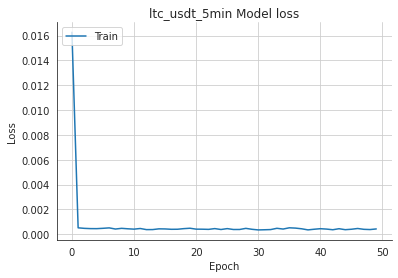

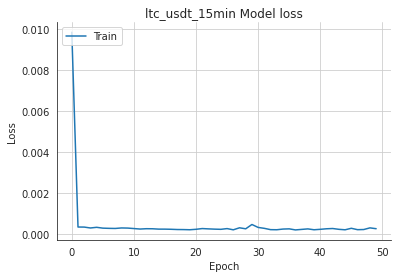

In [58]:
# Plot training & validation loss values
fig, ax = plt.subplots(figsize=(16, 5), sharex=True)
for coin_pair in df:  
  sns.lineplot(data=history[coin_pair].history["loss"])
  plt.title(coin_pair + " Model loss")
  plt.ylabel("Loss")
  plt.xlabel("Epoch")
  ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
  plt.legend(["Train", "Test"], loc="upper left")
  plt.grid()
  plt.show()

# Get the predicted values GRU

In [59]:

for coin_pair in df: 
  # Get the predicted values
  y_pred_scaled[coin_pair] = model[coin_pair].predict(x_test[coin_pair])

  # Unscale the predicted values
  y_pred[coin_pair] = scaler[coin_pair].inverse_transform(y_pred_scaled[coin_pair])
  y_test_unscaled[coin_pair] = scaler[coin_pair].inverse_transform(y_test[coin_pair].reshape(-1, 1))

  print(coin_pair)
  # Mean Absolute Error (MAE)
  MAE = mean_absolute_error(y_test_unscaled[coin_pair], y_pred[coin_pair])
  print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')
  result["GRU"].append(np.round(MAE, 2))

  # Mean Absolute Percentage Error (MAPE)
  MAPE = np.mean((np.abs(np.subtract(y_test_unscaled[coin_pair], y_pred[coin_pair])/ y_test_unscaled[coin_pair]))) * 100
  print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

  # Median Absolute Percentage Error (MDAPE)
  MDAPE = np.median((np.abs(np.subtract(y_test_unscaled[coin_pair], y_pred[coin_pair])/ y_test_unscaled[coin_pair])) ) * 100
  print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

result  

11/11 [==============================] - 1s 6ms/step
btc_usdt_5min
Median Absolute Error (MAE): 18.61
Mean Absolute Percentage Error (MAPE): 0.11 %
Median Absolute Percentage Error (MDAPE): 0.1 %
8/8 [==============================] - 1s 6ms/step
btc_usdt_15min
Median Absolute Error (MAE): 52.86
Mean Absolute Percentage Error (MAPE): 0.28 %
Median Absolute Percentage Error (MDAPE): 0.21 %
11/11 [==============================] - 1s 6ms/step
eth_usdt_5min
Median Absolute Error (MAE): 0.81
Mean Absolute Percentage Error (MAPE): 0.06 %
Median Absolute Percentage Error (MDAPE): 0.04 %
8/8 [==============================] - 1s 7ms/step
eth_usdt_15min
Median Absolute Error (MAE): 3.54
Mean Absolute Percentage Error (MAPE): 0.25 %
Median Absolute Percentage Error (MDAPE): 0.2 %
11/11 [==============================] - 1s 7ms/step
ltc_usdt_5min
Median Absolute Error (MAE): 0.14
Mean Absolute Percentage Error (MAPE): 0.18 %
Median Absolute Percentage Error (MDAPE): 0.17 %
8/8 [=================

{'LSTM': [7.27, 40.02, 0.77, 4.92, 0.17, 0.3],
 'GRU': [18.61, 52.86, 0.81, 3.54, 0.14, 0.29],
 'bi_LSTM': []}

In [60]:
visualise_pred = {}
for coin_pair in df: 
  train_data_len = math.ceil(np_data_scaled[coin_pair].shape[0] * 0.8)
  visualise_pred[coin_pair] = data_filtered[coin_pair].iloc[train_data_len:, 3:4]
  visualise_pred[coin_pair]['prediction'] = y_pred[coin_pair]
  visualise_pred[coin_pair]['test'] = y_test_unscaled[coin_pair]
visualise_pred["btc_usdt_5min"]

,close,prediction,test
2023-01-05 19:24:59.999,16844.56,16827.859375,16844.56
2023-01-05 19:29:59.999,16834.72,16825.937500,16834.72
2023-01-05 19:34:59.999,16835.15,16817.718750,16835.15
2023-01-05 19:39:59.999,16849.38,16816.828125,16849.38
2023-01-05 19:44:59.999,16846.32,16831.750000,16846.32
...,...,...,...
2023-01-06 23:44:59.999,16943.20,16927.228516,16943.20
2023-01-06 23:49:59.999,16961.14,16919.736328,16961.14
2023-01-06 23:54:59.999,16952.01,16938.216797,16952.01
2023-01-06 23:59:59.999,16950.65,16924.015625,16950.65


In [62]:

for coin_pair in df: 
  trace_test = go.Scatter(x=visualise_pred[coin_pair].index, y=visualise_pred[coin_pair]['test'], mode='lines', name='Test')
  trace_pred = go.Scatter(x=visualise_pred[coin_pair].index, y=visualise_pred[coin_pair]['prediction'], mode='lines', name='Prediction')
  data = [trace_test, trace_pred]
  layout2 = go.Layout( width=1000, height=700,xaxis_title=coin_pair)
  fig = go.Figure(data=data, layout=layout2)
  # Plot it and save as basic-line.html
  pyo.iplot(fig, filename = 'chart')

# Training bi-LSTM Prediction Model

In [66]:
for coin_pair in df:  
  # Configure the neural network model
  model[coin_pair] = Sequential()

  model[coin_pair].add(Bidirectional(LSTM(n_neurons, return_sequences=True, input_shape=(x_train[coin_pair].shape[1], x_train[coin_pair].shape[2]))))
  model[coin_pair].add(Bidirectional(LSTM(n_neurons, return_sequences=False)))
  model[coin_pair].add(Dense(6))
  model[coin_pair].add(Dense(1))

  # Compile the model
  model[coin_pair].compile(optimizer='adam', loss='mse')

In [67]:
# Training the model

for coin_pair in df:  
  history[coin_pair] = model[coin_pair].fit(x_train[coin_pair], y_train[coin_pair],
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test[coin_pair], y_test[coin_pair])
                   )

Epoch 1/50
84/84 [==============================] - 12s 36ms/step - loss: 0.0184 - val_loss: 0.0019
Epoch 2/50
84/84 [==============================] - 2s 18ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 3/50
84/84 [==============================] - 2s 18ms/step - loss: 8.9542e-04 - val_loss: 0.0011
Epoch 4/50
84/84 [==============================] - 2s 18ms/step - loss: 8.4213e-04 - val_loss: 0.0011
Epoch 5/50
84/84 [==============================] - 2s 18ms/step - loss: 7.8276e-04 - val_loss: 0.0011
Epoch 6/50
84/84 [==============================] - 2s 26ms/step - loss: 7.4447e-04 - val_loss: 8.1632e-04
Epoch 7/50
84/84 [==============================] - 2s 24ms/step - loss: 7.4990e-04 - val_loss: 0.0013
Epoch 8/50
84/84 [==============================] - 2s 18ms/step - loss: 6.7518e-04 - val_loss: 9.5858e-04
Epoch 9/50
84/84 [==============================] - 2s 19ms/step - loss: 5.8966e-04 - val_loss: 7.0488e-04
Epoch 10/50
84/84 [==============================] - 2s 18ms/step - 

# Plot training & validation loss values bi-LSTM

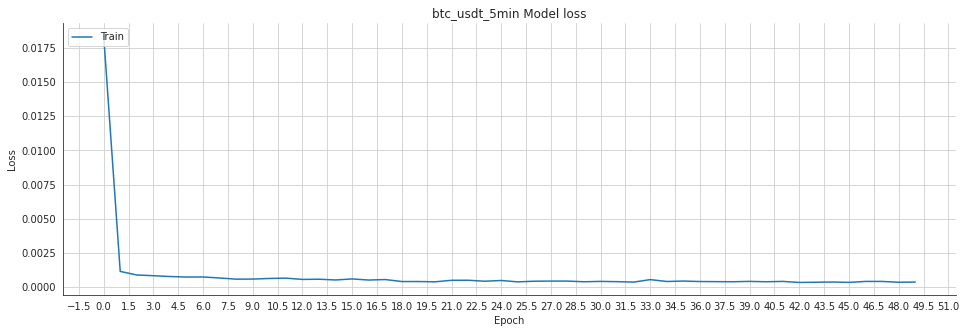

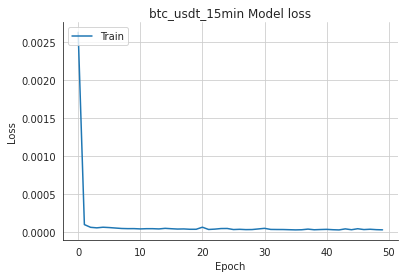

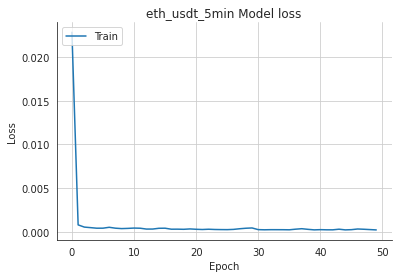

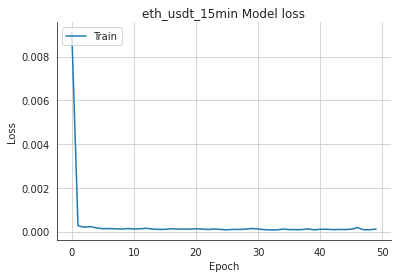

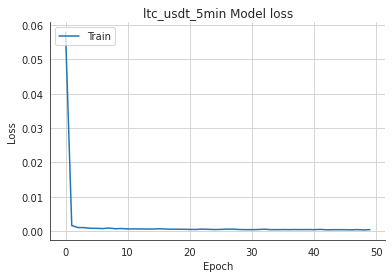

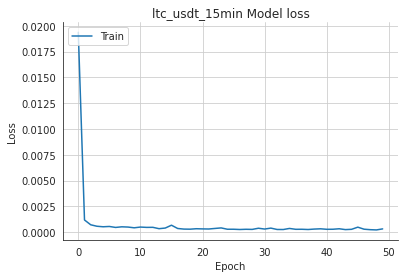

In [68]:
# Plot training & validation loss values
fig, ax = plt.subplots(figsize=(16, 5), sharex=True)
for coin_pair in df:  
  sns.lineplot(data=history[coin_pair].history["loss"])
  plt.title(coin_pair + " Model loss")
  plt.ylabel("Loss")
  plt.xlabel("Epoch")
  ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
  plt.legend(["Train", "Test"], loc="upper left")
  plt.grid()
  plt.show()

# Get the predicted values bi-LSTM

In [69]:

for coin_pair in df: 
  # Get the predicted values
  y_pred_scaled[coin_pair] = model[coin_pair].predict(x_test[coin_pair])

  # Unscale the predicted values
  y_pred[coin_pair] = scaler[coin_pair].inverse_transform(y_pred_scaled[coin_pair])
  y_test_unscaled[coin_pair] = scaler[coin_pair].inverse_transform(y_test[coin_pair].reshape(-1, 1))

  print(coin_pair)
  # Mean Absolute Error (MAE)
  MAE = mean_absolute_error(y_test_unscaled[coin_pair], y_pred[coin_pair])
  print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')
  result["bi_LSTM"].append(np.round(MAE, 2))

  # Mean Absolute Percentage Error (MAPE)
  MAPE = np.mean((np.abs(np.subtract(y_test_unscaled[coin_pair], y_pred[coin_pair])/ y_test_unscaled[coin_pair]))) * 100
  print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

  # Median Absolute Percentage Error (MDAPE)
  MDAPE = np.median((np.abs(np.subtract(y_test_unscaled[coin_pair], y_pred[coin_pair])/ y_test_unscaled[coin_pair])) ) * 100
  print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

result 

11/11 [==============================] - 2s 13ms/step
btc_usdt_5min
Median Absolute Error (MAE): 8.16
Mean Absolute Percentage Error (MAPE): 0.05 %
Median Absolute Percentage Error (MDAPE): 0.04 %
8/8 [==============================] - 2s 11ms/step
btc_usdt_15min
Median Absolute Error (MAE): 51.99
Mean Absolute Percentage Error (MAPE): 0.28 %
Median Absolute Percentage Error (MDAPE): 0.17 %
11/11 [==============================] - 1s 13ms/step
eth_usdt_5min
Median Absolute Error (MAE): 0.77
Mean Absolute Percentage Error (MAPE): 0.06 %
Median Absolute Percentage Error (MDAPE): 0.04 %
8/8 [==============================] - 1s 10ms/step
eth_usdt_15min
Median Absolute Error (MAE): 4.28
Mean Absolute Percentage Error (MAPE): 0.31 %
Median Absolute Percentage Error (MDAPE): 0.23 %
11/11 [==============================] - 1s 13ms/step
ltc_usdt_5min
Median Absolute Error (MAE): 0.18
Mean Absolute Percentage Error (MAPE): 0.24 %
Median Absolute Percentage Error (MDAPE): 0.21 %
8/8 [===========

{'LSTM': [7.27, 40.02, 0.77, 4.92, 0.17, 0.3],
 'GRU': [18.61, 52.86, 0.81, 3.54, 0.14, 0.29],
 'bi_LSTM': [8.16, 51.99, 0.77, 4.28, 0.18, 0.3]}

In [70]:
visualise_pred = {}
for coin_pair in df: 
  train_data_len = math.ceil(np_data_scaled[coin_pair].shape[0] * 0.8)
  visualise_pred[coin_pair] = data_filtered[coin_pair].iloc[train_data_len:, 3:4]
  visualise_pred[coin_pair]['prediction'] = y_pred[coin_pair]
  visualise_pred[coin_pair]['test'] = y_test_unscaled[coin_pair]
visualise_pred["btc_usdt_5min"]

,close,prediction,test
2023-01-05 19:24:59.999,16844.56,16838.646484,16844.56
2023-01-05 19:29:59.999,16834.72,16840.521484,16834.72
2023-01-05 19:34:59.999,16835.15,16830.580078,16835.15
2023-01-05 19:39:59.999,16849.38,16828.873047,16849.38
2023-01-05 19:44:59.999,16846.32,16843.412109,16846.32
...,...,...,...
2023-01-06 23:44:59.999,16943.20,16947.060547,16943.20
2023-01-06 23:49:59.999,16961.14,16938.720703,16961.14
2023-01-06 23:54:59.999,16952.01,16956.019531,16952.01
2023-01-06 23:59:59.999,16950.65,16945.697266,16950.65


In [71]:

for coin_pair in df: 
  trace_test = go.Scatter(x=visualise_pred[coin_pair].index, y=visualise_pred[coin_pair]['test'], mode='lines', name='Test')
  trace_pred = go.Scatter(x=visualise_pred[coin_pair].index, y=visualise_pred[coin_pair]['prediction'], mode='lines', name='Prediction')
  data = [trace_test, trace_pred]
  layout2 = go.Layout( width=1000, height=700,xaxis_title=coin_pair)
  fig = go.Figure(data=data, layout=layout2)
  # Plot it and save as basic-line.html
  pyo.iplot(fig, filename = 'chart')

# Model Performance

In [73]:
pairs = ["btc_usdt_5min", "btc_usdt_15min", "eth_usdt_5min", "eth_usdt_15min", "ltc_usdt_5min", "ltc_usdt_15min"]
result_df = pd.DataFrame(result, index = pairs)
result_df

,LSTM,GRU,bi_LSTM
btc_usdt_5min,7.27,18.61,8.16
btc_usdt_15min,40.02,52.86,51.99
eth_usdt_5min,0.77,0.81,0.77
eth_usdt_15min,4.92,3.54,4.28
ltc_usdt_5min,0.17,0.14,0.18
ltc_usdt_15min,0.30,0.29,0.30


# Rank Calculation

In [81]:
def calculate_rank(metrics, order):
    rank1 = []
    rank2 = []
    rank3 = []
    for index, row in metrics.iterrows():
        temp = row.copy()
        if order == 'ASC':
            sorted = np.sort(temp.values)
        else:
            sorted = -np.sort(-temp.values)
            
        rank1.append(sorted.tolist().index(row[0]) + 1)
        rank2.append(sorted.tolist().index(row[1]) + 1)
        rank3.append(sorted.tolist().index(row[2]) + 1)

        result = {}
    result["LSTM"] = rank1
    result["GRU"] = rank2
    result["bi_LSTM"] = rank3
    ranking_df = pd.DataFrame(result, index = pairs)
    return ranking_df

In [82]:
result_ranking = calculate_rank(result_df, 'ASC')
result_ranking

,LSTM,GRU,bi_LSTM
btc_usdt_5min,1,3,2
btc_usdt_15min,1,3,2
eth_usdt_5min,1,3,1
eth_usdt_15min,3,1,2
ltc_usdt_5min,2,1,3
ltc_usdt_15min,2,1,2


# Rank Average 

In [83]:
rank_avg_result = result_ranking.mean(axis=0)
rank_avg_result

LSTM       1.666667
GRU        2.000000
bi_LSTM    2.000000
dtype: float64

# Finding the sum of squared differences

In [96]:
def sum_of_squared_differences_1(rank_avg):
    sum = 0
    for x in rank_avg.values:
        sum = sum + (x - 2) ** 2
    sum_of_squared_differences_1 = 10 * sum
    return sum_of_squared_differences_1

def sum_of_squared_differences_2(ranking_df):
    summation = 0
    for index, row in ranking_df.iterrows():
        summation = summation + ((row[0] - 2) ** 2) + ((row[1] - 2) ** 2) + ((row[2] - 2) ** 2)
    sum_of_squared_differences_2 = summation * 0.05
    return sum_of_squared_differences_2

def friedman_statistic(rank_avg, ranking_df):
    friedman_statistic = sum_of_squared_differences_1(rank_avg) / sum_of_squared_differences_2(ranking_df)
    decision = "greater than " if friedman_statistic > p_value else "less than "
    decision2 = "can " if friedman_statistic > p_value else "can not "
    print("Since the Friedman statistic " + str(friedman_statistic) + " is " + decision + str(p_value) + " so we " + decision2 + "reject the null hypothesis that all algorithms perform equally")    

#Finding p-value
p_value = scipy.stats.chi2.ppf(0.95, 3)
p_value        

7.814727903251179

# Testing hypothesis all alogrithm perform equally

In [97]:
# Friedman statistic
friedman_statistic(rank_avg_result, result_ranking)

Since the Friedman statistic 1.851851851851851 is less than 7.814727903251179 so we can not reject the null hypothesis that all algorithms perform equally


# Finding critical difference (CD) using Nemenyi test
#### The q alpha 2.343 is taken from the course textbook and also from this #### link https://plos.figshare.com/articles/dataset/Critical_values_for_the_two-tailed_Nemenyi_test_/7299293/1
#k = 3, n =  6

In [94]:
cd = 2.343 * math.sqrt(3 * (3 + 1) / (6 * 6))
cd

1.352731680711293

In [95]:

def critical_difference(rank_avg):
    no_of_means__of_ranks = len(rank_avg)
    for i in range(no_of_means__of_ranks - 1):
        for j in range(i + 1, no_of_means__of_ranks):
            diff = abs(rank_avg[i] - rank_avg[j])
            decision = " and it exceeds the critical difference " if diff > cd else " and does not exceeds the critical difference "
            print("The difference of " + rank_avg.index[i] + " - " + str(rank_avg[i])  + " and " + rank_avg.index[j] + " - " + str(rank_avg[j]) + " is " + str(diff) +  decision + str(cd))


In [93]:
critical_difference(rank_avg_result)

The difference of LSTM - 1.6666666666666667 and GRU - 2.0 is 0.33333333333333326 and does not exceeds the critical difference 1.0478214542564015
The difference of LSTM - 1.6666666666666667 and bi_LSTM - 2.0 is 0.33333333333333326 and does not exceeds the critical difference 1.0478214542564015
The difference of GRU - 2.0 and bi_LSTM - 2.0 is 0.0 and does not exceeds the critical difference 1.0478214542564015
